# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

test = cities[:10] #make sure to update this!!!!!!

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(test):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_min']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | belyy yar
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | karratha
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | gobabis
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | aasiaat
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          10
Lat           10
Lng           10
Max Temp      10
Humidity      10
Cloudiness    10
Wind Speed    10
Country       10
Date          10
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,288.87,80,23,1.77,ZA,1733703136
1,belyy yar,53.6039,91.3903,264.09,73,0,4.00,RU,1733703137
2,blackmans bay,-43.0167,147.3167,289.22,60,94,5.03,AU,1733703139
3,karratha,-20.7377,116.8463,301.71,71,99,6.05,AU,1733703140
4,longyearbyen,78.2186,15.6401,269.06,68,75,4.63,SJ,1733702850


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,288.87,80,23,1.77,ZA,1733703136
1,belyy yar,53.6039,91.3903,264.09,73,0,4.00,RU,1733703137
2,blackmans bay,-43.0167,147.3167,289.22,60,94,5.03,AU,1733703139
3,karratha,-20.7377,116.8463,301.71,71,99,6.05,AU,1733703140
4,longyearbyen,78.2186,15.6401,269.06,68,75,4.63,SJ,1733702850


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

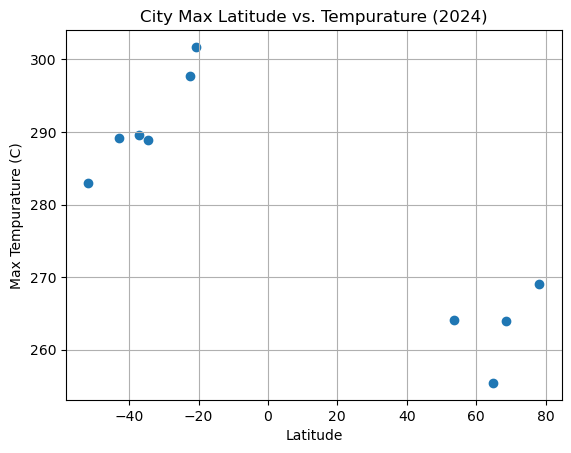

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (C)')
plt.title('City Max Latitude vs. Tempurature (2024)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

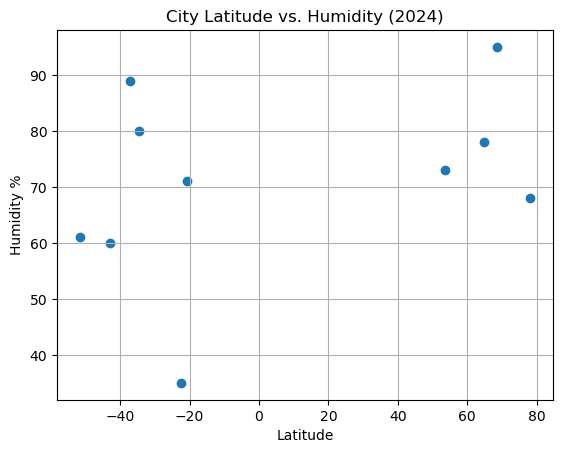

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity (2024)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

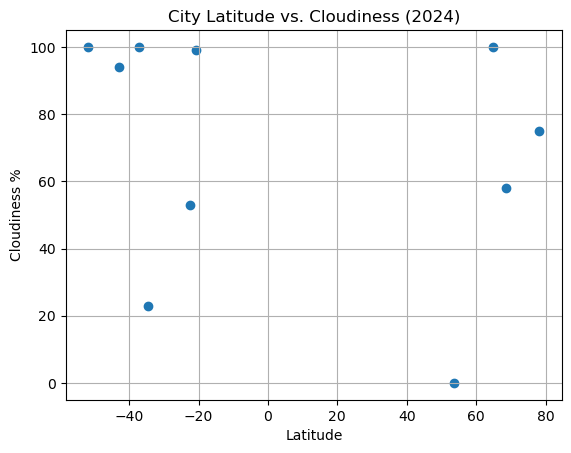

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness (2024)')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

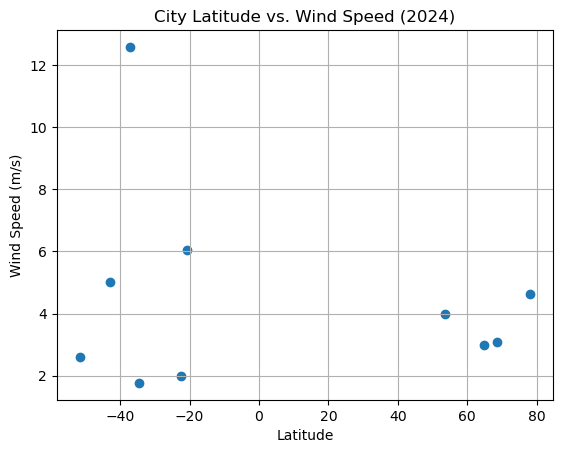

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def calc_lin_req(lat,yvar):
    (slope,intercept,rvalue,pvalue,std) = linregress(lat,yvar)
    regress_values = lat * slope + intercept
    return regress_values


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,belyy yar,53.6039,91.3903,264.09,73,0,4.00,RU,1733703137
4,longyearbyen,78.2186,15.6401,269.06,68,75,4.63,SJ,1733702850
8,anadyr,64.7500,177.4833,255.43,78,100,3.00,RU,1733703146
9,aasiaat,68.7098,-52.8699,264.01,95,58,3.08,GL,1733703148


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,288.87,80,23,1.77,ZA,1733703136
2,blackmans bay,-43.0167,147.3167,289.22,60,94,5.03,AU,1733703139
3,karratha,-20.7377,116.8463,301.71,71,99,6.05,AU,1733703140
5,gobabis,-22.4500,18.9667,297.72,35,53,1.98,NaN,1733703142
6,edinburgh of the seven seas,-37.0676,-12.3116,289.63,89,100,12.58,SH,1733703144


###  Temperature vs. Latitude Linear Regression Plot

Text(20, 15, 'City_ID\n1    260.185538\n4    265.918782\n8    262.781682\n9    263.703997\nName: Lat, dtype: float64')

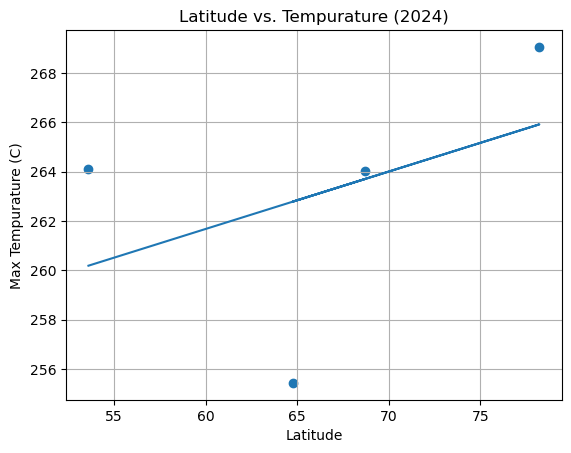

In [49]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (C)')
plt.title('Latitude vs. Tempurature (2024)')

test2 = calc_lin_req(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regression_line = slope * northern_hemi_df['Lat'] + intercept

plt.plot(northern_hemi_df['Lat'],test2,label='regression line')
plt.annotate(test2,(20,15),fontsize=15,color="red")


Text(20, 15, 'City_ID\n0    291.903767\n2    287.278821\n3    299.423222\n5    298.489839\n6    290.521707\n7    282.532644\nName: Lat, dtype: float64')

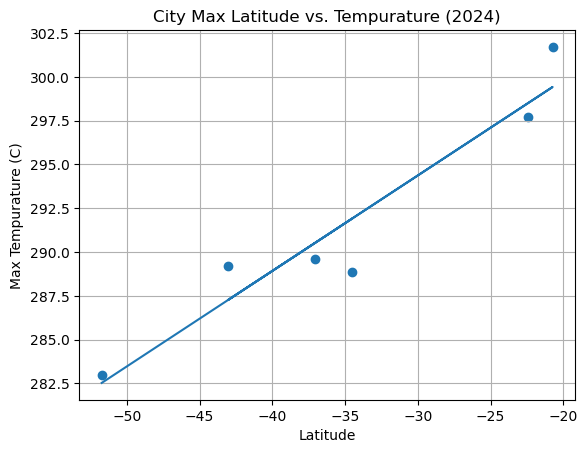

In [48]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Tempurature (C)')
plt.title('Latitude vs. Tempurature (2024)')

test2 = calc_lin_req(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],test2,label='regression line')

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regression_line = slope * northern_hemi_df['Lat'] + intercept

plt.annotate(test2,(20,15),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Humidity'],northern_hemi_df['Max Temp'],)

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE